In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('empalme.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RAD-SOL
0,29/01/2018,21:00,229,281,4.0,6.5,32.1,17,1013.3,0.0,659.0
1,29/01/2018,21:10,225,261,3.9,6.6,32.4,15,1013.2,0.0,647.0
2,29/01/2018,21:20,227,300,3.4,6.3,32.4,15,1013.2,0.0,629.0
3,29/01/2018,21:30,230,276,3.5,6.4,32.6,15,1013.1,0.0,609.0
4,29/01/2018,21:40,225,274,3.5,6.6,32.3,14,1013.0,0.0,585.0


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
RAPVIENTO2    float64
RAPRAFAGA2    float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RAD-SOL       float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RAD-SOL,FECHA
0,229,281,4.0,6.5,32.1,17,1013.3,0.0,659.0,2018-01-29 21:00:00
1,225,261,3.9,6.6,32.4,15,1013.2,0.0,647.0,2018-01-29 21:10:00
2,227,300,3.4,6.3,32.4,15,1013.2,0.0,629.0,2018-01-29 21:20:00
3,230,276,3.5,6.4,32.6,15,1013.1,0.0,609.0,2018-01-29 21:30:00
4,225,274,3.5,6.6,32.3,14,1013.0,0.0,585.0,2018-01-29 21:40:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RAD-SOL
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.0,144.000000
mean,276.229167,263.819444,2.650694,4.915972,24.097917,22.756944,1013.529861,0.0,198.333333
std,30.499047,116.743497,1.084087,1.814073,5.601092,6.677639,0.863808,0.0,270.555502
min,206.000000,1.000000,0.500000,1.100000,15.100000,11.000000,1012.100000,0.0,-1.000000
25%,253.500000,261.000000,1.900000,3.500000,19.100000,15.000000,1013.000000,0.0,-1.000000
50%,288.000000,326.000000,2.700000,4.850000,23.300000,25.000000,1013.500000,0.0,-1.000000
75%,298.250000,339.000000,3.500000,6.500000,30.525000,27.000000,1013.925000,0.0,438.000000
max,328.000000,360.000000,4.800000,9.200000,32.900000,35.000000,1015.300000,0.0,710.000000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RAD-SOL,FECHA
26,256,317,1.5,3.0,24.7,25,1012.3,0.0,-1.0,2018-01-30 01:20:00
27,264,330,1.9,3.5,24.3,27,1012.4,0.0,-1.0,2018-01-30 01:30:00
29,257,297,1.9,3.5,24.1,26,1012.5,0.0,-1.0,2018-01-30 01:50:00
37,279,333,3.1,5.8,24.3,24,1013.2,0.0,-1.0,2018-01-30 03:10:00
38,282,327,3.2,6.5,24.7,22,1013.2,0.0,-1.0,2018-01-30 03:20:00
39,279,327,3.3,6.1,24.2,24,1013.3,0.0,-1.0,2018-01-30 03:30:00
114,286,358,0.7,1.3,24.1,22,1015.0,0.0,344.0,2018-01-30 16:00:00


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS           276.229167
DIRR           263.819444
RAPVIENTO2       2.650694
RAPRAFAGA2       4.915972
TEMP            24.097917
HR              22.756944
PB            1013.529861
PREC             0.000000
RAD-SOL        198.333333
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

24.097916666666663

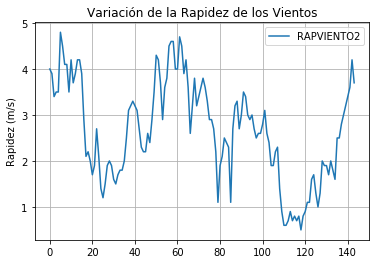

In [13]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.RAPVIENTO2.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

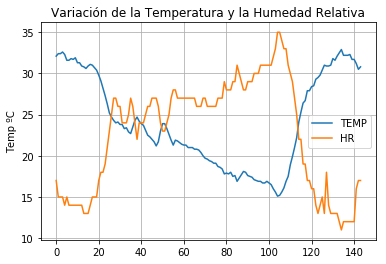

In [14]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

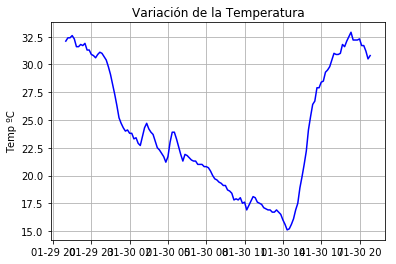

In [15]:

plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()